## Intial analysis of the data (EDA)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Read the CSV file
df = pd.read_csv('log2.csv')

In [14]:
# Display the data of DataFrame
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [15]:
# Print the column names
df.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received',
       'Action'],
      dtype='object')

In [16]:
# Check the number of missing valuas
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

In [17]:
# Generate summary statistics
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


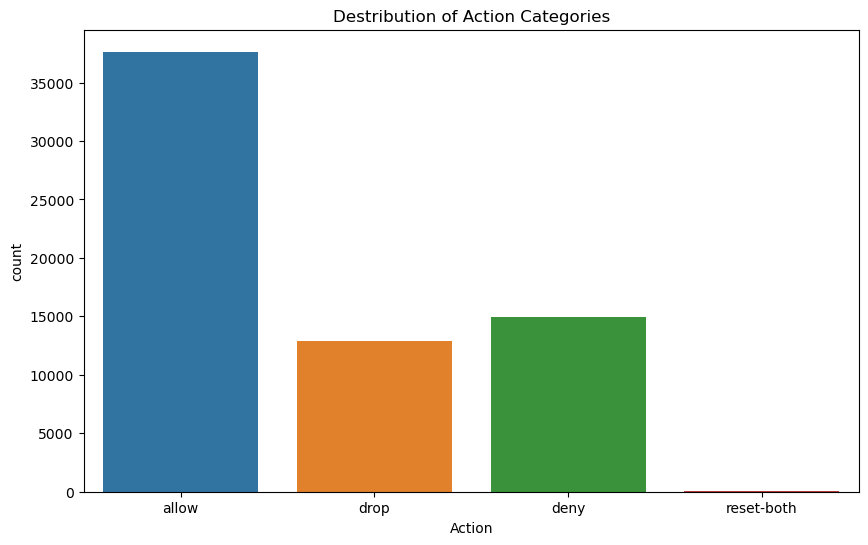

In [18]:
# Create a visual countplot to display the number of each "Action" category
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Action', data = df)
plt.title('Destribution of Action Categories')
plt.show()

## Discuss your findings and what relevance they might have on your planned classification algorithms

* **Data browsing and inspection :** At the first, I quickly view the data through the data loading and preliminary exploration step, which is the starting point of any data analysis project to understand the structure and information contained in the data set. To ensure the quality of model training, and run the code to check for missing values in the data, If there are missing values, you may need to fill or delete operations. This is important for the algorithms to be run later, because they may not be able to handle missing data directly, but during the inspection, no missing values ​​were shown, which means As long as the data set is complete, I can omit the step of dealing with missing data. Further, I ran the code to get the statistics and quickly got a sense of their range and the size of the data. This not only helped me understand the distribution of the features, but also pointed out the wide range of values ​​for some features, indicating differences within the dataset.

* **Generate statistics and visualizations :** Through descriptive statistical analysis, we understood the distribution range and central tendency of each numerical feature. And through the created visualization results, it is shown that the number of instances of some categories in the "Action" category is much higher than that of other categories. This imbalance may bias the majority class and ignore the minority class during training, which may affect the model's predictive ability for the minority class.

After the above findings, I feel that the classification algorithm planned to be used will need to be insensitive to data integrity, and be able to handle or adapt to differences in feature size, as well as have the ability to handle class imbalance.

In [19]:
# Map target categories to numbers
action_map = {
    'allow': 0,
    'deny': 1,
    'drop': 2,
    'reset-both': 3
}

In [20]:
# New numeric label column
df['Action_Numerical'] = df['Action'].map(action_map)

In [21]:
# Separate features and labels
x = df.drop(['Action', 'Action_Numerical'], axis = 1)
y = df['Action_Numerical']

In [22]:
# Divide training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Perform any preparation of the data

* **Feature encoding :** In machine learning algorithms, models usually cannot directly process text data, so text needs to be converted into numerical values. Therefore, the text categories in the "Action" column will be converted into corresponding numerical labels through numerical conversion operations. This step allows the model to better understand and learn how to distinguish different network traffic categories.

* **Feature selection :** To avoid the risk of data leakage, by building a predictive model, removing unnecessary features from the data set and retaining the most relevant features will help the model focus on the most important information. Improving its prediction accuracy on unknown data also increases the speed of the model when processing new data.

* **Split the dataset :** The feature set and target variables are split into a training set and a test set, and the consistency of this split in different runs is ensured by fixing the parameters.

## Create and implement at least 2 classification algorithms that will output a classification based on the Action: (class attribute) feature.

### Random Forest

In [25]:
# Initial Random Forest Classifier
randomforest = RandomForestClassifier(random_state = 42)

In [26]:
# Model training
randomforest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Model prediction
predicted_randomforest_test = randomforest.predict(x_test)
predicted_randomforest_train = randomforest.predict(x_train)